# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
mot_amb_calls_df = pd.read_csv('motorbike_ambulance_calls.csv')

mot_amb_calls_df.head()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [15]:
mot_amb_calls_df["date"] = pd.to_datetime(mot_amb_calls_df["date"])

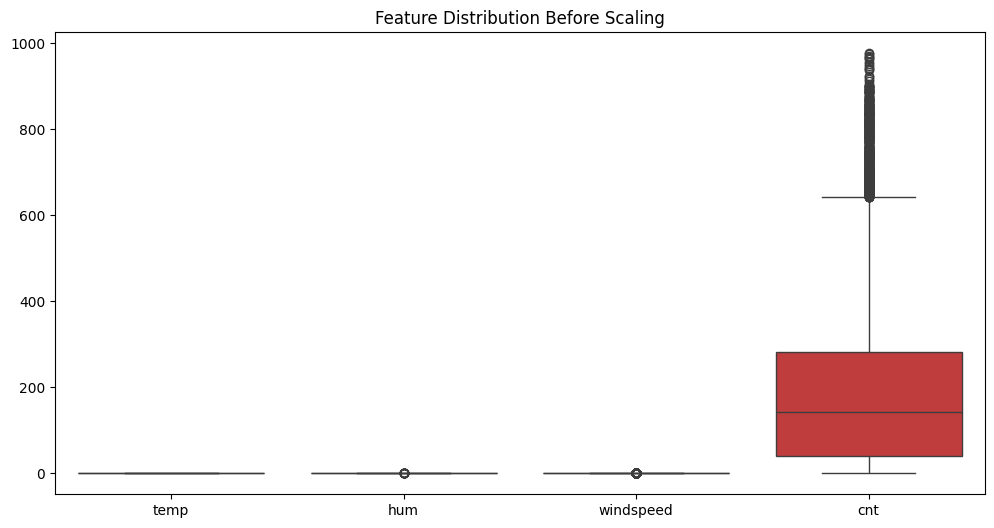

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=mot_amb_calls_df[["temp", "hum", "windspeed", "cnt"]])
plt.title("Feature Distribution Before Scaling")

plt.show()

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(mot_amb_calls_df[["temp", "hum", "windspeed", "cnt"]])

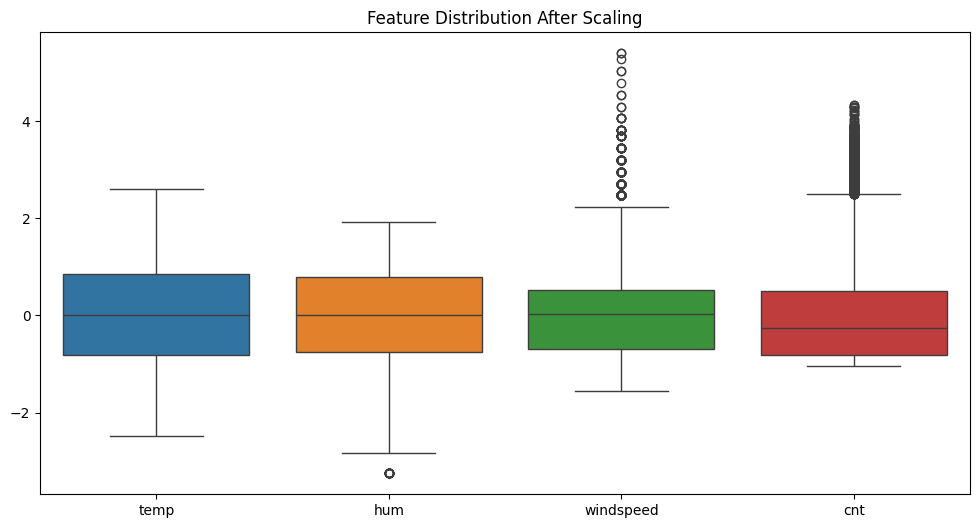

In [18]:
scaled_df = pd.DataFrame(scaled_features, columns=["temp", "hum", "windspeed", "cnt"])
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df)
plt.title("Feature Distribution After Scaling")

plt.show()

In [19]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
mot_amb_calls_df["anomaly"] = iso_forest.fit_predict(scaled_features)

**Виявлення аномалій було проведено за допомогою `Isolation Forest`**

In [20]:
anomalies = mot_amb_calls_df[mot_amb_calls_df["anomaly"] == -1]
normal_data = mot_amb_calls_df[mot_amb_calls_df["anomaly"] == 1]

In [21]:
anomalies.to_csv('anomalies.csv', index=False)
normal_data.to_csv('normal_data.csv', index=False)

**Точки даних, позначені як аномалії, відокремлюються у датафрейм `anomalies`, а нормальні точки зберігаються в `normal_data`**

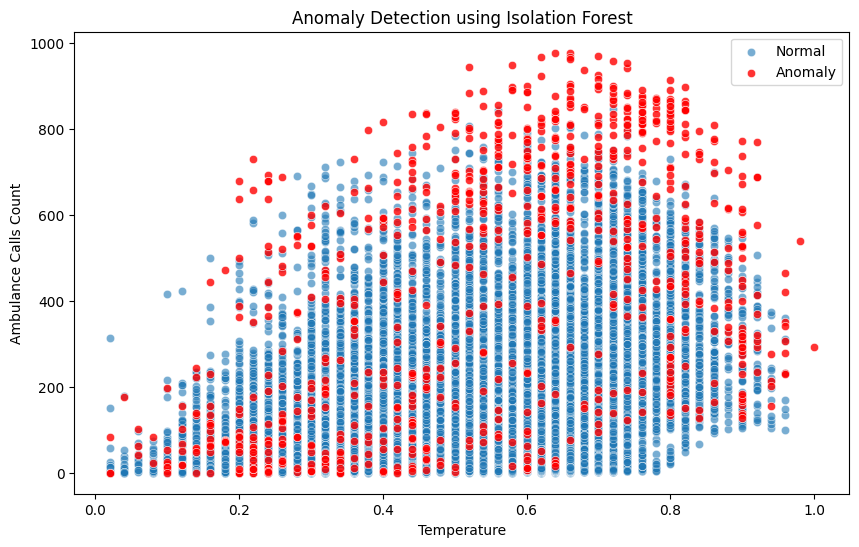

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=normal_data, x="temp", y="cnt", label="Normal", alpha=0.6)
sns.scatterplot(data=anomalies, x="temp", y="cnt", label="Anomaly", color="red", alpha=0.8)
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Temperature")
plt.ylabel("Ambulance Calls Count")
plt.legend()

plt.show()

**Було побудовано діаграму розсіювання (scatterplot) для візуалізації аномалій і нормальних точок даних. Для виявлення аномалій було взято показники `температури (temp)` та `кількість викликів (cnt)`**

In [23]:
print(f"Total anomalies detected: {len(anomalies)}")
print(anomalies.describe())

Total anomalies detected: 869
              index                           date          yr        mnth  \
count    869.000000                            869  869.000000  869.000000   
mean    9970.953970  2012-02-24 13:15:23.820483328    0.681243    6.159954   
min      176.000000            2011-01-08 00:00:00    0.000000    1.000000   
25%     5036.000000            2011-08-02 00:00:00    0.000000    3.000000   
50%    11260.000000            2012-04-19 00:00:00    1.000000    6.000000   
75%    14271.000000            2012-08-22 00:00:00    1.000000    9.000000   
max    17345.000000            2012-12-30 00:00:00    1.000000   12.000000   
std     5195.811495                            NaN    0.466263    3.226254   

               hr     holiday     weekday  workingday  weathersit        temp  \
count  869.000000  869.000000  869.000000  869.000000  869.000000  869.000000   
mean    13.873418    0.014960    3.192175    0.737629    1.378596    0.556962   
min      0.000000    0.0

**Застосування `Isolation Forest` виявило `869` аномалій у датасеті, які представляють точки даних із екстремальними/неочікуваними значеннями щодо `кількості викликів швидкої допомоги (cnt)`, `температури (temp)`, `вологості (hum)` та `швидкості вітру (windspeed)`.**

**Розуміння цих аномалій має важливе значення для вдосконалення стратегій реагування на надзвичайні ситуації, так як вони можуть висвітлити рідкісні події або операційну неефективність** 